In [3]:
#imports das libs necessárias para o estudo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing, tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier

# 1. Importando os dados

In [4]:
#importando os dados MutualClients.csv
csv = 'MutualClients.csv'
df = pd.read_csv(csv, encoding='utf-8', sep = ',')

## 1.1. Informação acerca dos dados

In [5]:
df.head()

,Unnamed: 0,clientId,shopId,gender,maritalStatus,age,numberOfDependents,education,flagResidencialPhone,areaCodeResidencialPhone,...,professionCode,mateIncome,flagResidencialAddress_PostalAddress,flagOtherCard,quantityBankingAccounts,flagMobilePhone,flagContactPhone,personalNetIncome,codeApplicationBooth,BAD
0,1,2,15,F,S,18,0,NaN,Y,31,...,853,0.0,Y,N,0,N,N,300.0,0,0
1,2,4,12,F,C,47,0,NaN,N,31,...,35,0.0,Y,N,0,N,N,304.0,0,0
2,3,5,16,F,S,28,0,NaN,Y,31,...,24,0.0,Y,N,0,N,N,250.0,0,0
3,4,6,24,M,S,26,0,NaN,N,31,...,999,0.0,Y,N,0,N,N,800.0,0,0
4,5,7,55,F,S,22,0,NaN,Y,31,...,999,0.0,Y,N,0,N,N,410.0,0,0


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            40000 non-null  int64  
 1   clientId                              40000 non-null  int64  
 2   shopId                                40000 non-null  int64  
 3   gender                                39997 non-null  object 
 4   maritalStatus                         40000 non-null  object 
 5   age                                   40000 non-null  int64  
 6   numberOfDependents                    40000 non-null  int64  
 7   education                             0 non-null      float64
 8   flagResidencialPhone                  40000 non-null  object 
 9   areaCodeResidencialPhone              40000 non-null  int64  
 10  bestPaymentDay                        40000 non-null  int64  
 11  shopRank       

,Unnamed: 0,clientId,shopId,age,numberOfDependents,education,areaCodeResidencialPhone,bestPaymentDay,shopRank,monthsInResidence,monthsInTheJob,professionCode,mateIncome,quantityBankingAccounts,personalNetIncome,codeApplicationBooth,BAD
count,40000.00000,40000.000000,40000.000000,40000.000000,40000.0,0.0,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.0,4.000000e+04,40000.0,40000.000000
mean,20000.50000,24982.227000,20.822950,34.649725,0.0,NaN,33.812275,15.313950,0.015950,152.921100,50.629500,484.611875,50.993333,0.0,9.752711e+03,0.0,0.197500
std,11547.14972,14428.531759,14.571913,13.076200,0.0,NaN,10.402941,7.159757,0.212124,136.096962,73.875139,382.102372,507.159125,0.0,4.856335e+05,0.0,0.398118
min,1.00000,2.000000,1.000000,15.000000,0.0,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.0,0.000000
25%,10000.75000,12458.750000,12.000000,23.000000,0.0,NaN,31.000000,9.000000,0.000000,36.000000,12.000000,88.000000,0.000000,0.0,2.700000e+02,0.0,0.000000
50%,20000.50000,25058.500000,21.000000,33.000000,0.0,NaN,31.000000,12.000000,0.000000,120.000000,24.000000,514.000000,0.000000,0.0,4.000000e+02,0.0,0.000000
75%,30000.25000,37425.250000,24.000000,43.000000,0.0,NaN,31.000000,20.000000,0.000000,240.000000,60.000000,865.000000,0.000000,0.0,7.380000e+02,0.0,0.000000
max,40000.00000,50000.000000,96.000000,88.000000,0.0,NaN,70.000000,28.000000,3.000000,1188.000000,1176.000000,999.000000,70000.000000,0.0,3.852910e+07,0.0,1.000000


# 2. Limpeza de Dados

### 2.1. Ajustes de Nulos e Drop

Duas colunas possuiam indicidência de nulos. 

* A coluna 'gender' foi mantida com os três valores nulos sem modificação.

* E a coluna 'education' foi excluída, já que todos os valores desta eram nulos.

Em relação às exclusões,

* A coluna Unnamed foi excluída, já que não tinha uso e era apenas um index repetido.
* As colunas clientId, shopId, numberOfDependents, shopRank, flagOtherCard, quantityBankingAccounts, flagMobilePhone, flagContactPhone e codeApplicationBooth possuiam todos os valores em zero ou eram apenas variáveis identificadoras (que não possuem necessidade na análise), como não iam mudar a predição e nem a análise exploratória, elas foram excluídas.

In [7]:
df = df.drop(['education','Unnamed: 0'], axis=1)
df = df.drop(['clientId', 'shopId','numberOfDependents','shopRank','flagOtherCard','quantityBankingAccounts', 'flagMobilePhone','flagContactPhone', 'codeApplicationBooth'], axis=1)

### 2.2. Tratamento de Outliers

A manutenção de outliers será feita após a análise exploratória e pode ser encontrada no campo de Feature Engineering.

# 3. Manipulação de Dados

## 3.1. Organizando o dataframe de acordo com a idade, de forma crescente.

Organizar o dataframe desta forma facilita o processo na etapa de Análise Exploratória em procurar os BAD's para associar às idades.

In [8]:
df.sort_values(by=['age'])

,gender,maritalStatus,age,flagResidencialPhone,areaCodeResidencialPhone,bestPaymentDay,residenceType,monthsInResidence,flagMothersName,flagFathersName,flagResidenceTown_WorkingTown,flagResidenceState_WorkingState,monthsInTheJob,professionCode,mateIncome,flagResidencialAddress_PostalAddress,personalNetIncome,BAD
17561,M,C,15,Y,31,18,P,408,Y,Y,Y,Y,12,38,0.0,Y,400.0,0
39253,F,S,15,Y,31,20,P,540,Y,Y,Y,Y,12,131,0.0,Y,291.0,0
33764,F,S,15,Y,31,12,C,120,Y,Y,N,Y,24,950,0.0,Y,600.0,1
5236,M,S,15,Y,24,28,C,240,Y,Y,N,N,0,706,0.0,Y,180.0,0
31490,M,S,15,Y,31,12,P,240,Y,Y,N,Y,12,265,0.0,Y,374.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31094,F,V,83,Y,31,28,P,12,Y,Y,N,Y,0,704,0.0,Y,212.0,0
22113,M,D,84,Y,31,12,P,120,Y,Y,N,Y,12,13,0.0,Y,2979.0,0
5003,F,O,86,N,50,28,P,84,Y,N,N,Y,12,703,0.0,Y,360.0,0
36335,F,S,88,Y,31,8,P,360,Y,Y,N,Y,0,13,0.0,Y,1709.0,0


## 3.2. Modificando o Datatype

In [9]:
#modificação necessária já que não existem valores do tipo float nestas colunas
df[['personalNetIncome', 'mateIncome']] = df[['personalNetIncome', 'mateIncome']].astype(int)

# 4. Análise Exploratória

## 4.1. Gênero e a variável BAD

Como se comporta variável de Inadimplência quando associada ao Gênero?

In [10]:
#dfs para armazenar os rows para cada gênero
fem = df.loc[df['gender']=='F']
male = df.loc[df['gender']=='M']

badFem = fem.BAD.value_counts()
badMale = male.BAD.value_counts()

#percentual dos gêneros
percentBADFem = (100 * badFem[1])/(badFem[0]+badFem[1])
percentBADMale = (100 * badMale[1])/(badMale[0]+badMale[1])

#variação percentual entre os gêneros
variacao_perc = percentBADMale-percentBADFem

print("Porcentagem de inadimplentes do gênero feminino: {:.2f}%".format(percentBADFem))
print("Porcentagem de inadimplentes do gênero masculino: {:.2f}%".format(percentBADMale))
print("Houve uma variação percentual de {:.2f}% entre os gêneros feminino e masculino.".format(variacao_perc))

Porcentagem de inadimplentes do gênero feminino: 17.99%
Porcentagem de inadimplentes do gênero masculino: 23.81%
Houve uma variação percentual de 5.81% entre os gêneros feminino e masculino.


A partir das porcentagens encontradas, podemos inferir que o gênero não é tão categórico para classificar a inadimplência de um indivíduo, isso porque, ambos os resultados estão muito próximos um do outro, o que pode ser observado através da baixa variação percentual. Ainda que, o gênero feminino tenha alcançado uma porcentagem menor de inadimplência.

## 4.2. Idade e a variável BAD

Como se comporta variável de Inadimplência quando associada à Idade?

In [11]:
#dataframe para armazenar a porcentagem de inadimplentes em relação à idade
age_df = pd.DataFrame(columns=['age','percentBAD'])

#idade máxima na coluna 'age' do dataframe
max_age = df['age'].max()

for count in range(15,max_age+1):
    row_data = {}
    aux = df.loc[df['age']==count]
    aux_bad = aux.BAD.value_counts()

    if(len(aux_bad)==0):
        continue
        
    row_data['age'] = count

    if(len(aux_bad)!= 2):
        if 0 in aux_bad.index:
            row_data['percentBAD'] = 0
        else:
            row_data['percentBAD'] = 100

    else:
        row_data['percentBAD'] = ((100*aux_bad[1])/(aux_bad[0]+aux_bad[1]))

    row_df = pd.DataFrame.from_records([row_data])
    age_df = pd.concat([age_df, row_df], ignore_index=True)

age_df.head()

,age,percentBAD
0,15,20.000000
1,16,25.000000
2,17,27.777778
3,18,35.598923
4,19,31.639263


Com os dados relativizados em porcentagens para cada idade, podemos então plotar um gráfico para visualizar a ocorrência das idades na inadimplência,

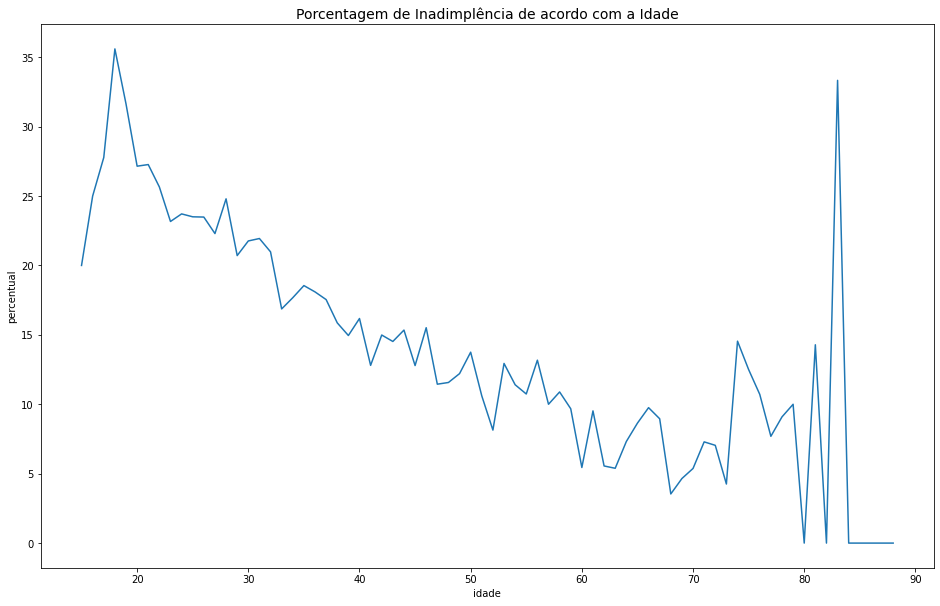

In [12]:
plt.figure(figsize=(16,10))
plt.title("Porcentagem de Inadimplência de acordo com a Idade", fontsize='14')

plt.xlabel('idade')
plt.ylabel('percentual')
plt.plot(age_df['age'], age_df['percentBAD'])

plt.show()

A partir do gráfico podemos inferir que, pessoas mais jovens possuem maior porcentagem de inadimplência, enquanto pessoas no intervalo de 60 a 70 anos possuem uma porcentagem menor. É possível observar também que, o intervalo de 80 a 90 anos possui um outlier aparente, isto é, um valor que se diferencia muito dos demais e que pode causar uma mudança na predição, por isso é necessário se atentar a ele.

## 4.3. Estado Civil e a variável BAD

Como se comporta variável de Inadimplência quando associada ao Estado Civil?

In [13]:
#dfs para armazenar os rows de estado civil
married = df.loc[df['maritalStatus']=='C']
divorced = df.loc[df['maritalStatus']=='D']
single = df.loc[df['maritalStatus']=='S']
widow = df.loc[df['maritalStatus']=='V']
other = df.loc[df['maritalStatus']=='O']

marriedBAD = married.BAD.value_counts()
divorcedBAD = divorced.BAD.value_counts()
singleBAD = single.BAD.value_counts()
widowBAD = widow.BAD.value_counts()
otherBAD = other.BAD.value_counts()

#percentual dos estados civis
percentBADmarried = (100 * marriedBAD[1])/(marriedBAD[0]+marriedBAD[1])
percentBADdivorced = (100 * divorcedBAD[1])/(divorcedBAD[0]+divorcedBAD[1])
percentBADsingle = (100 * singleBAD[1])/(singleBAD[0]+singleBAD[1])
percentBADwidow = (100 * widowBAD[1])/(widowBAD[0]+widowBAD[1])
percentBADother = (100 * otherBAD[1])/(otherBAD[0]+otherBAD[1])

print("Porcentagem de inadimplentes de estado civil 'casado': {:.2f}%".format(percentBADmarried))
print("Porcentagem de inadimplentes de estado civil 'divorciado': {:.2f}%".format(percentBADdivorced))
print("Porcentagem de inadimplentes de estado civil 'solteiro': {:.2f}%".format(percentBADsingle))
print("Porcentagem de inadimplentes de estado civil 'viúvo': {:.2f}%".format(percentBADwidow))
print("Porcentagem de inadimplentes de estado civil 'outro': {:.2f}%".format(percentBADother))

Porcentagem de inadimplentes de estado civil 'casado': 14.55%
Porcentagem de inadimplentes de estado civil 'divorciado': 15.03%
Porcentagem de inadimplentes de estado civil 'solteiro': 24.02%
Porcentagem de inadimplentes de estado civil 'viúvo': 11.93%
Porcentagem de inadimplentes de estado civil 'outro': 23.29%


Os resultados apresentam diferenças, mesmo que pequenas, para cada estado civil, e que podem ser bastante relevantes na predição. Também de acordo com a análise, pessoas viúvas apresentam menor porcentagem de inadimplência, enquanto pessoas solteiras apresentam uma porcentagem maior.

## 4.4. Renda e a variável BAD

Como se comporta variável de Inadimplência quando associada à Renda?

In [14]:
#valor máximo e mediano de 'personalNetIncome'
max_income = df['personalNetIncome'].max()
median = df['personalNetIncome'].median()

print("Mediana dos valores de renda:",median)

Mediana dos valores de renda: 400.0


De forma a tornar o estudo menos enviesado e com base na mediana, podemos dividir os intervalos em pequenas riquezas, isto é, por intervalos de 500 e observar como se comporta a variável BAD para cada um deles.

In [15]:
#dfs para armazenar os rows de cada intervalo
between0_500 = df.loc[df['personalNetIncome'].between(0, 500)]
between500_1000 = df.loc[df['personalNetIncome'].between(501, 1000)]
between1000_2000 = df.loc[df['personalNetIncome'].between(1001, 2000)]
between2000_3000 = df.loc[df['personalNetIncome'].between(2001, 3000)]
between3000_max = df.loc[df['personalNetIncome'].between(3001, max_income)]

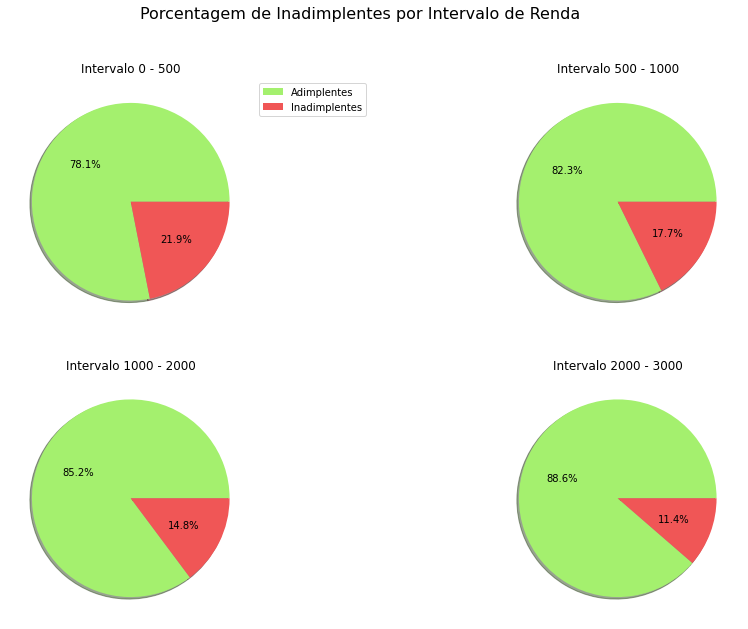

In [16]:
fig, axs = plt.subplots(2, 2,figsize=(16,10))
fig.suptitle("Porcentagem de Inadimplentes por Intervalo de Renda", fontsize=16)

axs[0][0].pie(between0_500.BAD.value_counts(), autopct='%1.1f%%', shadow=True, colors=['#A4F06E','#F05656'])
axs[0][0].set_title('Intervalo 0 - 500')
axs[0][1].pie(between500_1000.BAD.value_counts(), autopct='%1.1f%%', shadow=True, colors=['#A4F06E','#F05656'])
axs[0][1].set_title('Intervalo 500 - 1000')
axs[1][0].pie(between1000_2000.BAD.value_counts(), autopct='%1.1f%%', shadow=True, colors=['#A4F06E','#F05656'])
axs[1][0].set_title('Intervalo 1000 - 2000')
axs[1][1].pie(between2000_3000.BAD.value_counts(), autopct='%1.1f%%', shadow=True, colors=['#A4F06E','#F05656'])
axs[1][1].set_title('Intervalo 2000 - 3000')

axs[0][0].legend(bbox_to_anchor=(1, 1), labels=['Adimplentes','Inadimplentes'])

plt.show()

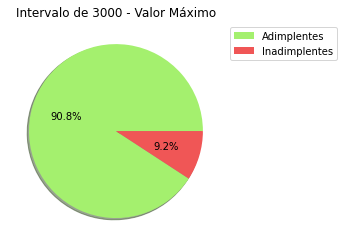

In [17]:
plt.pie(between3000_max.BAD.value_counts(), autopct='%1.1f%%', shadow=True, colors=['#A4F06E','#F05656'])
plt.title('Intervalo de 3000 - Valor Máximo')
plt.legend(bbox_to_anchor=(1, 1), labels=['Adimplentes','Inadimplentes'])
plt.show()

A partir dos gráficos é possível observar que a variável BAD e personalNetIncome são inversamente proporcionais, isto é, para pessoas que possuem rendas menores a porcentagem de inadimplência é maior, do mesmo que, quanto mais esta renda aumenta, mais a porcentagem de inadimplência diminui. 

## 4.5. Dia de Pagamento e a variável BAD

Como se comporta variável de Inadimplência quando associada ao Dia de Pagamento?

Para esta avaliação, podemos facilitar dividindo o mês em 3 partes,

In [18]:
#dfs para armazenar os rows para cada intervalo
beginning = df.loc[df['bestPaymentDay'].between(0, 10)]
middle = df.loc[df['bestPaymentDay'].between(11, 20)]
end = df.loc[df['bestPaymentDay'].between(21, 31)]

Para o intervalo do dia 1 ao dia 10, temos que

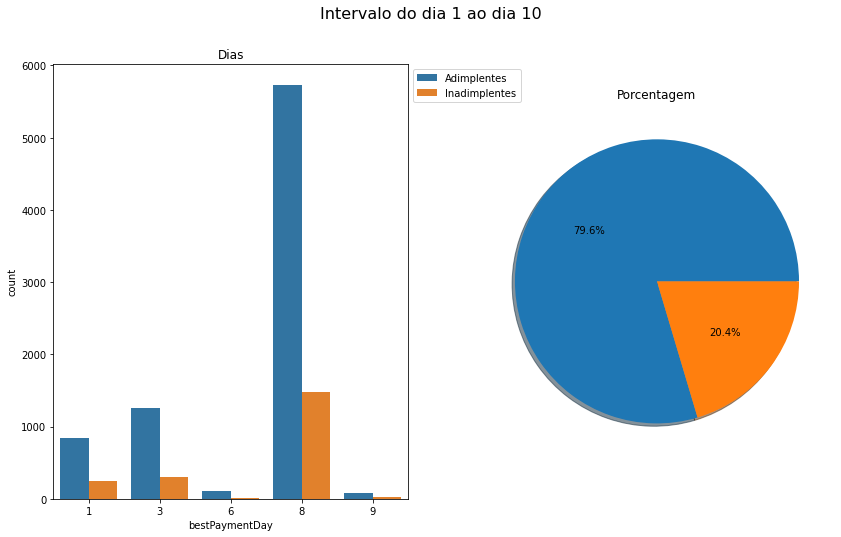

In [19]:
fig, axs = plt.subplots(1, 2,figsize=(14,8))
fig.suptitle("Intervalo do dia 1 ao dia 10", fontsize=16)

sns.countplot(ax = axs[0], x=beginning.bestPaymentDay, hue=beginning.BAD)
axs[0].set_title('Dias')

axs[1].pie(beginning.BAD.value_counts(), autopct='%1.1f%%', shadow=True)
axs[1].set_title('Porcentagem')

axs[0].legend(bbox_to_anchor=(1, 1), loc='best', labels=['Adimplentes','Inadimplentes'])

plt.show()

Para o intervalo do dia 11 ao dia 20, temos que

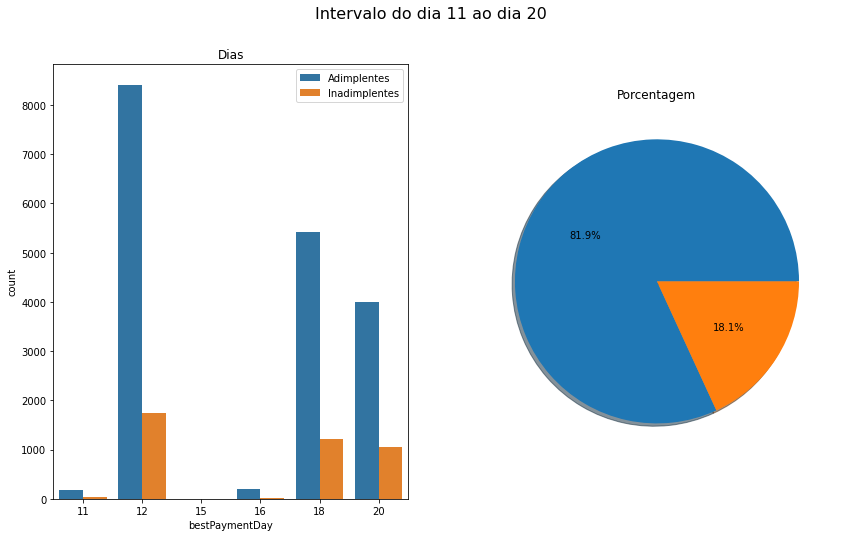

In [20]:
fig, axs = plt.subplots(1, 2,figsize=(14,8))
fig.suptitle("Intervalo do dia 11 ao dia 20", fontsize=16)

sns.countplot(ax = axs[0], x=middle.bestPaymentDay, hue=middle.BAD)
axs[0].set_title('Dias')

axs[1].pie(middle.BAD.value_counts(), autopct='%1.1f%%', shadow=True)
axs[1].set_title('Porcentagem')

axs[0].legend(bbox_to_anchor=(1, 1), loc='best', labels=['Adimplentes','Inadimplentes'])

plt.show()

E finalmente, para o final do mês, do dia 21 ao dia 31

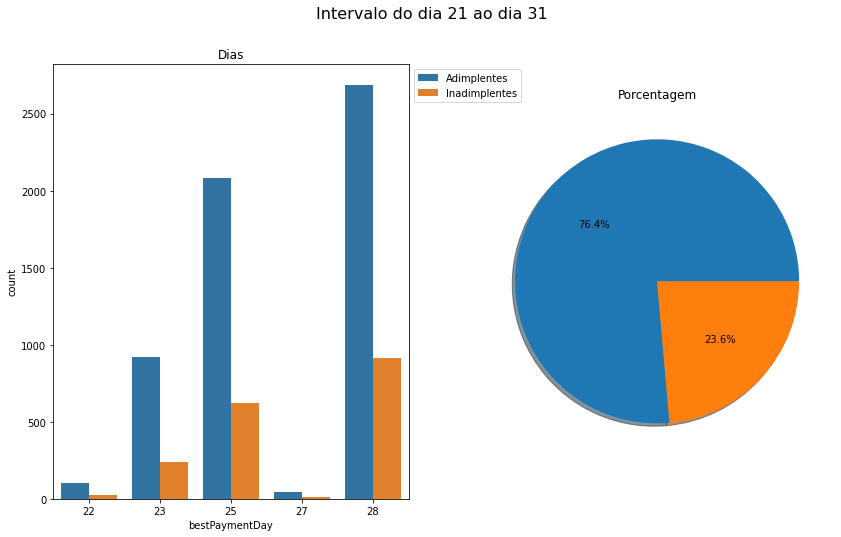

In [21]:
fig, axs = plt.subplots(1, 2,figsize=(14,8))
fig.suptitle("Intervalo do dia 21 ao dia 31", fontsize=16)

sns.countplot(ax = axs[0], x=end.bestPaymentDay, hue=end.BAD)
axs[0].set_title('Dias')

axs[1].pie(end.BAD.value_counts(), autopct='%1.1f%%', shadow=True)
axs[1].set_title('Porcentagem')

axs[0].legend(bbox_to_anchor=(1, 1), loc='best', labels=['Adimplentes','Inadimplentes'])

plt.show()

Ainda que a variação percentual entre os gráficos seja 'baixa', esta variável pode ser decisiva, já que, se observarmos os gráficos de contagem e porcentagem, a menor inadimplência encontrada (no intervalo de 11 a 21 dias) difere de aprox. 5% de variação percentual para a maior inadimplência encontrada (intervalo de 21 a 30 dias). Este percentual não se mantém absoluto se outras comparações forem feitas entre os três gráficos.

## 4.6. Tipo de Residência e a variável BAD

Como se comporta variável de Inadimplência quando associada ao Tipo de Residência?

In [22]:
#dfs para armazenar os rows de tipos de residência
own = df.loc[df['residenceType']=='P']
rent = df.loc[df['residenceType']=='A']
parents = df.loc[df['residenceType']=='C']
other = df.loc[df['residenceType']=='O']

ownBAD = own.BAD.value_counts()
rentBAD = rent.BAD.value_counts()
parentsBAD = parents.BAD.value_counts()
otherBAD = other.BAD.value_counts()

#percentual dos tipos de residência
percentBADown = (100 * ownBAD[1])/(ownBAD[0]+ownBAD[1])
percentBADrent = (100 * rentBAD[1])/(rentBAD[0]+rentBAD[1])
percentBADparents = (100 * parentsBAD[1])/(parentsBAD[0]+parentsBAD[1])
percentBADother = (100 * otherBAD[1])/(otherBAD[0]+otherBAD[1])

print("Porcentagem de inadimplentes com o tipo de moradia 'própria': {:.2f}%".format(percentBADown))
print("Porcentagem de inadimplentes com o tipo de moradia 'alugada': {:.2f}%".format(percentBADrent))
print("Porcentagem de inadimplentes com o tipo de moradia 'mora com os pais': {:.2f}%".format(percentBADparents))
print("Porcentagem de inadimplentes com o tipo de moradia 'outros': {:.2f}%".format(percentBADother))

Porcentagem de inadimplentes com o tipo de moradia 'própria': 19.04%
Porcentagem de inadimplentes com o tipo de moradia 'alugada': 22.46%
Porcentagem de inadimplentes com o tipo de moradia 'mora com os pais': 21.98%
Porcentagem de inadimplentes com o tipo de moradia 'outros': 19.37%


A partir da análise, observamos que o tipo de moradia não é tão categórica para determinar uma pessoa inadimplente, já que a variação percentual entre elas é muito baixa, ainda que a maior porcentagem de inadimplentes se apresente nas pessoas que possuem o tipo de moradia 'alugada', seguida de 'mora com os pais'.

## 4.7. Meses na Residência e a variável BAD

Como se comporta variável de Inadimplência quando associada ao Tempo (em meses) na Residência?

In [23]:
#valor máximo e mediano de 'monthsInResidence'
max_months = df['monthsInResidence'].max()
median = df['monthsInResidence'].median()

print("Mediana dos valores de meses de residência:", median)
print("Máximo de meses de residência:", max_months)

Mediana dos valores de meses de residência: 120.0
Máximo de meses de residência: 1188


### 4.7.1. Outlier

In [24]:
outlier = df.loc[df['monthsInResidence'] == max_months]
print("Meses na Residência:",outlier.monthsInResidence.values, "\nIdade:",outlier.age.values)

Meses na Residência: [1188] 
Idade: [41]


Aparentemente o valor máximo é um outlier, já que 1188 meses é equivalente à 99 anos.

Levando em consideração que,
* 88 anos é a idade máxima encontrada no dataframe.
* e a idade da pessoa que possui 1188 meses (99 anos) no residência é de 41 anos.

Temos então um erro aparente, que pode ser excluído desta base.

A partir da mediana podemos dividir os intervalos,

### 4.7.2. Dividimos então os meses em intervalos para analisar a inadimplência,

In [25]:
#dfs para armazenar os rows de cada intervalo
months0_60 = df.loc[df['monthsInResidence'].between(0, 60)]
months60_120 = df.loc[df['monthsInResidence'].between(61, 120)]
months120_180 = df.loc[df['monthsInResidence'].between(121, 180)]
months180_max = df.loc[df['monthsInResidence'].between(181, max_months)]

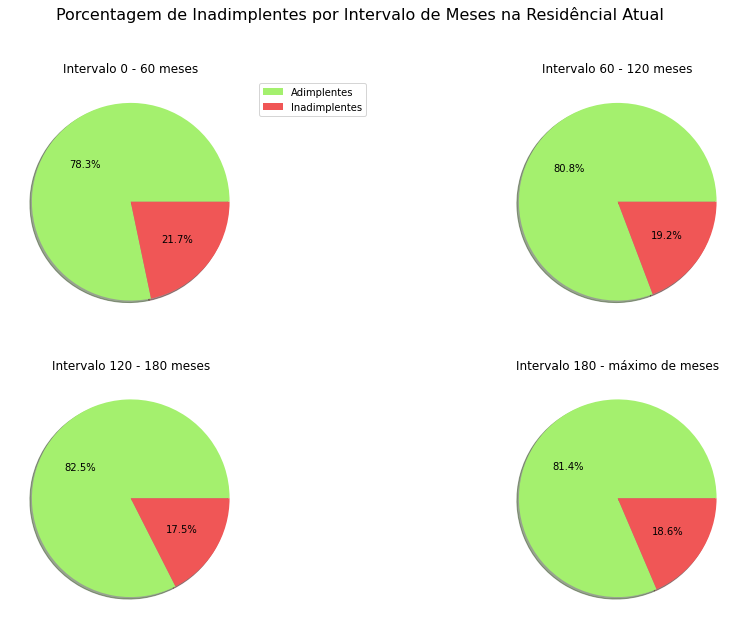

In [26]:
fig, axs = plt.subplots(2, 2,figsize=(16,10))
fig.suptitle("Porcentagem de Inadimplentes por Intervalo de Meses na Residêncial Atual", fontsize=16)

axs[0][0].pie(months0_60.BAD.value_counts(), autopct='%1.1f%%', shadow=True, colors=['#A4F06E','#F05656'])
axs[0][0].set_title('Intervalo 0 - 60 meses')
axs[0][1].pie(months60_120.BAD.value_counts(), autopct='%1.1f%%', shadow=True, colors=['#A4F06E','#F05656'])
axs[0][1].set_title('Intervalo 60 - 120 meses')
axs[1][0].pie(months120_180.BAD.value_counts(), autopct='%1.1f%%', shadow=True, colors=['#A4F06E','#F05656'])
axs[1][0].set_title('Intervalo 120 - 180 meses')
axs[1][1].pie(months180_max.BAD.value_counts(), autopct='%1.1f%%', shadow=True, colors=['#A4F06E','#F05656'])
axs[1][1].set_title('Intervalo 180 - máximo de meses')

axs[0][0].legend(bbox_to_anchor=(1, 1), labels=['Adimplentes','Inadimplentes'])

plt.show()

A partir dos gráficos podemos inferir que, apesar da diferença nas porcentagens, a variável 'monthsInResidence' não parece tão categórica para analisar se uma pessoa é ou não inadimplente já que as diferenças percentuais são pequenas.

## 4.8. Telefone Residencial e a variável BAD

Como se comporta variável de Inadimplência quando associada à Adição de Telefone Residencial (ao registro de empréstimo)?

In [27]:
#dfs para armazenar os rows de cada resposta
telY = df.loc[df['flagResidencialPhone'] == 'Y'] 
telN = df.loc[df['flagResidencialPhone'] == 'N']

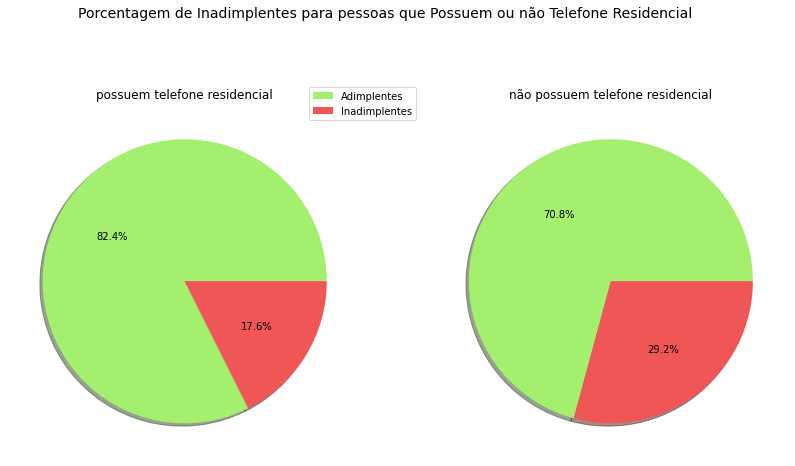

In [28]:
fig, axs = plt.subplots(1, 2,figsize=(14,8))
fig.suptitle("Porcentagem de Inadimplentes para pessoas que Possuem ou não Telefone Residencial", fontsize=14)

axs[0].pie(telY.BAD.value_counts(), autopct='%1.1f%%', shadow=True, colors=['#A4F06E','#F05656'])
axs[0].set_title('possuem telefone residencial')
axs[1].pie(telN.BAD.value_counts(), autopct='%1.1f%%', shadow=True, colors=['#A4F06E','#F05656'])
axs[1].set_title('não possuem telefone residencial')

axs[0].legend(bbox_to_anchor=(1, 1), loc='center', labels=['Adimplentes','Inadimplentes'])

plt.show()

Ou seja, ter um telefone residencial está relacionado com a variável BAD, já que, a maior porcentagem de inadimplência está ligada à não possuir um telefone residencial.

## 4.9. Código de Trabalho e a variável BAD

Como se comporta variável de Inadimplência quando associada ao Código de Trabalho?

In [29]:
#dataframe para armazenar a porcentagem de inadimplentes em relação ao código de profissão
professionCodes_df = pd.DataFrame(columns=['professionCode','percentBAD'])

##valor máximo da coluna 'professionCode'
max_code = df['professionCode'].max()

for code in range(0,max_code+1):
    row_data = {}
    aux = df.loc[df['professionCode'] == code]
    aux_bad = aux.BAD.value_counts()

    if(len(aux_bad)==0):
        continue
        
    row_data['professionCode'] = code

    if(len(aux_bad)!= 2):
        if 0 in aux_bad.index:
            row_data['percentBAD'] = 0
        else:
            row_data['percentBAD'] = 100

    else:
        row_data['percentBAD'] = ((100*aux_bad[1])/(aux_bad[0]+aux_bad[1]))

    row_df = pd.DataFrame.from_records([row_data])
    professionCodes_df = pd.concat([professionCodes_df, row_df], ignore_index=True)

professionCodes_df.head()

,professionCode,percentBAD
0,0,50.000000
1,1,4.166667
2,2,12.727273
3,3,20.000000
4,4,16.746411


Dividimos os códigos em dois intervalos para facilitar a visualização das porcentagens.

In [30]:
professionCodes_df0_500 = professionCodes_df.loc[professionCodes_df['professionCode'].between(0,500)]
professionCodes_df500_999 = professionCodes_df.loc[professionCodes_df['professionCode'].between(501,999)]

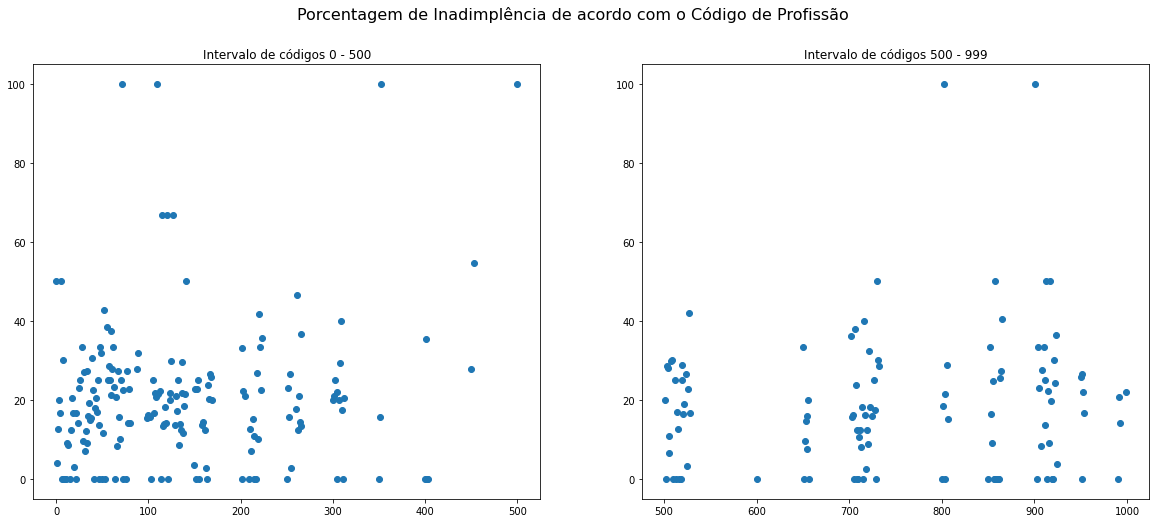

In [31]:
fig, axs = plt.subplots(1, 2,figsize=(20,8))
fig.suptitle("Porcentagem de Inadimplência de acordo com o Código de Profissão", fontsize=16)

axs[0].scatter(x=professionCodes_df0_500['professionCode'], y=professionCodes_df0_500['percentBAD'])
axs[0].set_title('Intervalo de códigos 0 - 500')

axs[1].scatter(professionCodes_df500_999['professionCode'], professionCodes_df500_999['percentBAD'])
axs[1].set_title('Intervalo de códigos 500 - 999')

plt.show()

A partir dos gráficos é possível observar que existem muitas variações percentuais dependendo do código de profissão, logo, este é um fator a ser analisado juntamente à outros fatores na predição.

## 4.10. Estabilidade no Trabalho e a variável BAD

Como se comporta variável de Inadimplência quando associada ao Tempo (meses) atuando em um Trabalho?

In [32]:
#valor máximo e mediano de 'monthsInTheJob'
max_months = df['monthsInTheJob'].max()
median = df['monthsInTheJob'].median()

print("Mediana dos valores de tempo (meses):",median)
print("Valor máximo de tempo (meses):", max_months)

Mediana dos valores de tempo (meses): 24.0
Valor máximo de tempo (meses): 1176


### 4.10.1. Possível Outlier

In [33]:
outlier = df.loc[df['monthsInTheJob'] == max_months]
print("Meses trabalhando:",outlier.monthsInTheJob.values, "\nIdade:",outlier.age.values)

Meses trabalhando: [1176] 
Idade: [24]


Aparentemente o valor máximo é um outlier, já que 1176 meses é equivalente à 98 anos.

Levando em consideração que,
* 88 anos é a idade máxima encontrada no dataframe.
* e a idade da pessoa que possui 1176 meses (98 anos) no trabalho é de 24 anos.

Temos então um erro aparente, que pode ser excluído desta base.

### 4.10.2. Dividimos então os meses em intervalos para analisar a inadimplência,

In [34]:
#dfs para armazenar os rows de cada intervalo
months0_12 = df.loc[df['monthsInTheJob'].between(0,12)]
months12_24 = df.loc[df['monthsInTheJob'].between(13,24)]
months24_36 = df.loc[df['monthsInTheJob'].between(25,36)]
months36_48 = df.loc[df['monthsInTheJob'].between(37,48)]
months48_60 = df.loc[df['monthsInTheJob'].between(49,60)]
months60_max = df.loc[df['monthsInTheJob'].between(61,max_months)]

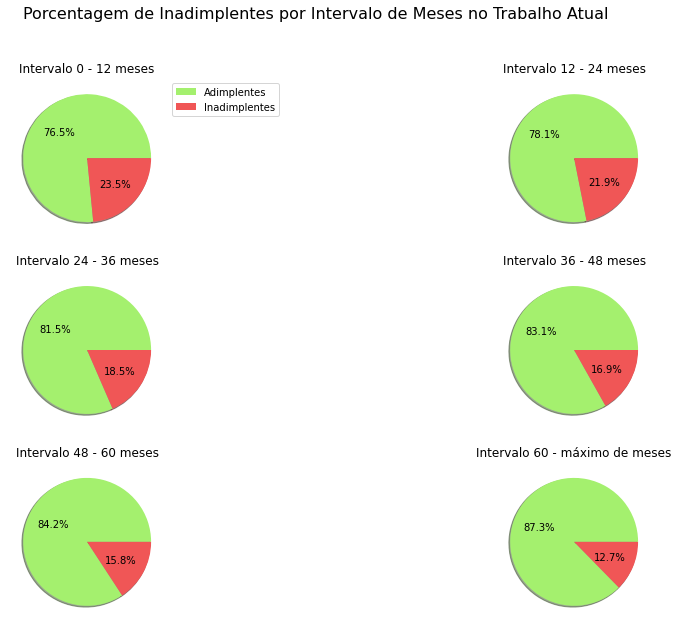

In [35]:
fig, axs = plt.subplots(3, 2,figsize=(16,10))
fig.suptitle("Porcentagem de Inadimplentes por Intervalo de Meses no Trabalho Atual", fontsize=16)

axs[0][0].pie(months0_12.BAD.value_counts(), autopct='%1.1f%%', shadow=True, colors=['#A4F06E','#F05656'])
axs[0][0].set_title('Intervalo 0 - 12 meses')
axs[0][1].pie(months12_24.BAD.value_counts(), autopct='%1.1f%%', shadow=True, colors=['#A4F06E','#F05656'])
axs[0][1].set_title('Intervalo 12 - 24 meses')
axs[1][0].pie(months24_36.BAD.value_counts(), autopct='%1.1f%%', shadow=True, colors=['#A4F06E','#F05656'])
axs[1][0].set_title('Intervalo 24 - 36 meses')
axs[1][1].pie(months36_48.BAD.value_counts(), autopct='%1.1f%%', shadow=True, colors=['#A4F06E','#F05656'])
axs[1][1].set_title('Intervalo 36 - 48 meses')

axs[2][0].pie(months48_60.BAD.value_counts(), autopct='%1.1f%%', shadow=True, colors=['#A4F06E','#F05656'])
axs[2][0].set_title('Intervalo 48 - 60 meses')

axs[2][1].pie(months60_max.BAD.value_counts(), autopct='%1.1f%%', shadow=True, colors=['#A4F06E','#F05656'])
axs[2][1].set_title('Intervalo 60 - máximo de meses')


axs[0][0].legend(bbox_to_anchor=(1, 1), labels=['Adimplentes','Inadimplentes'])

plt.show()

Observando os gráficos temos novamente outro caso de variáveis inversamente proporcionais, já que, para as menores porcentagens de inadimplência, maior são os meses de trabalho no trabalho atual. Pode-se dizer então que a 'estabilidade' em um emprego pode garantir pessoas mais adimplentes.

## 4.11. Trabalho no mesmo Estado e/ou Cidade e a variável BAD

Como se comporta variável de Inadimplência quando associada ao Local de Trabalho (em relação ao mesmo estado e/ou cidade de moradia)?

In [36]:
#dfs para armazenar os rows de cada resposta
stateY = df.loc[df['flagResidenceState_WorkingState'] == 'Y'] 
stateN = df.loc[df['flagResidenceState_WorkingState'] == 'N']
townY = df.loc[df['flagResidenceTown_WorkingTown'] == 'Y']
townN = df.loc[df['flagResidenceTown_WorkingTown'] == 'N']

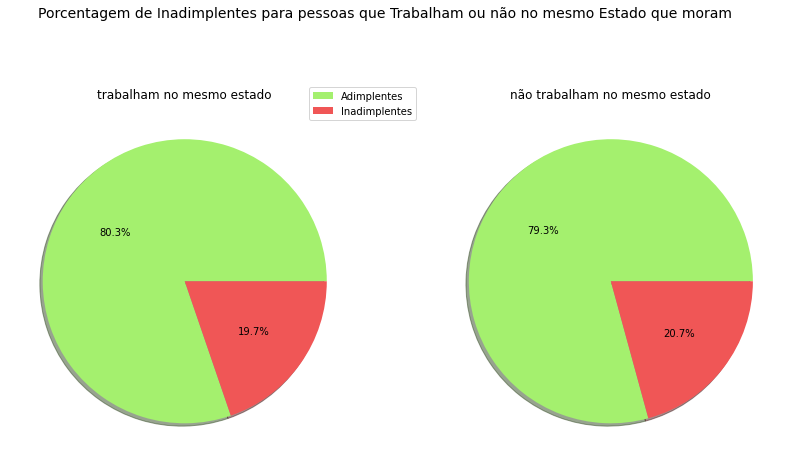

In [37]:
fig, axs = plt.subplots(1, 2,figsize=(14,8))
fig.suptitle("Porcentagem de Inadimplentes para pessoas que Trabalham ou não no mesmo Estado que moram", fontsize=14)

axs[0].pie(stateY.BAD.value_counts(), autopct='%1.1f%%', shadow=True, colors=['#A4F06E','#F05656'])
axs[0].set_title('trabalham no mesmo estado')
axs[1].pie(stateN.BAD.value_counts(), autopct='%1.1f%%', shadow=True, colors=['#A4F06E','#F05656'])
axs[1].set_title('não trabalham no mesmo estado')

axs[0].legend(bbox_to_anchor=(1, 1), loc='center', labels=['Adimplentes','Inadimplentes'])

plt.show()

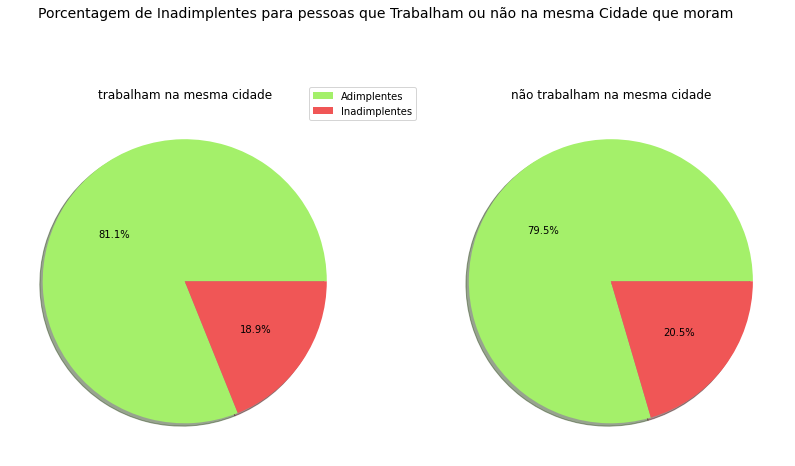

In [38]:
fig, axs = plt.subplots(1, 2,figsize=(14,8))
fig.suptitle("Porcentagem de Inadimplentes para pessoas que Trabalham ou não na mesma Cidade que moram", fontsize=14)

axs[0].pie(townY.BAD.value_counts(), autopct='%1.1f%%', shadow=True, colors=['#A4F06A','#F05656'])
axs[0].set_title('trabalham na mesma cidade')
axs[1].pie(townN.BAD.value_counts(), autopct='%1.1f%%', shadow=True, colors=['#A4F06A','#F05656'])
axs[1].set_title('não trabalham na mesma cidade')

axs[0].legend(bbox_to_anchor=(1, 1), loc='center', labels=['Adimplentes','Inadimplentes'])

plt.show()

A partir dos gráficos é possível perceber que em ambos os casos, a diferença percentual é muito baixa, tornando assim as variáveis 'flagResidenceTown_WorkingTown' e 'flagResidenceState_WorkingState' não tão categóricas para a variável BAD.

## 4.12. Adição do Nome do Pai/Mãe e a variável BAD 

Como se comporta variável de Inadimplência quando associada à Adição do Nome do Pai/Mãe (ao registro de empréstimo)?

In [39]:
#dfs para armazenar os rows de cada resposta
motherY = df.loc[df['flagMothersName'] == 'Y'] 
motherN = df.loc[df['flagMothersName'] == 'N']
fatherY = df.loc[df['flagFathersName'] == 'Y']
fatherN = df.loc[df['flagFathersName'] == 'N']

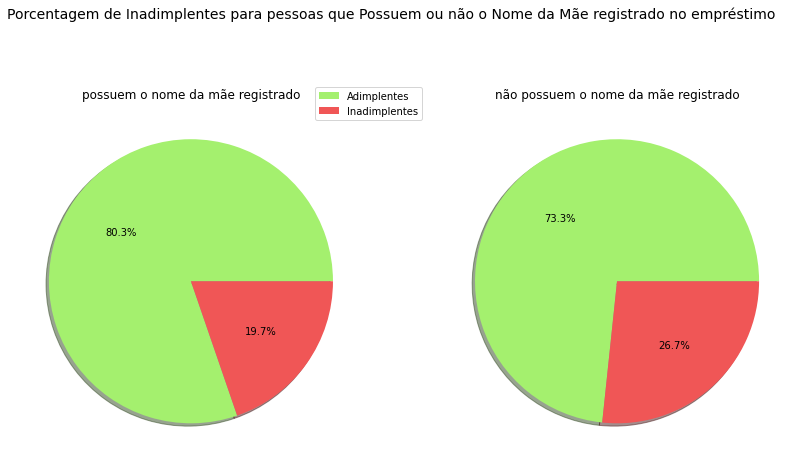

In [40]:
fig, axs = plt.subplots(1, 2,figsize=(14,8))
fig.suptitle("Porcentagem de Inadimplentes para pessoas que Possuem ou não o Nome da Mãe registrado no empréstimo", fontsize=14)

axs[0].pie(motherY.BAD.value_counts(), autopct='%1.1f%%', shadow=True, colors=['#A4F06E','#F05656'])
axs[0].set_title('possuem o nome da mãe registrado')
axs[1].pie(motherN.BAD.value_counts(), autopct='%1.1f%%', shadow=True, colors=['#A4F06E','#F05656'])
axs[1].set_title('não possuem o nome da mãe registrado')

axs[0].legend(bbox_to_anchor=(1, 1), loc='center', labels=['Adimplentes','Inadimplentes'])

plt.show()

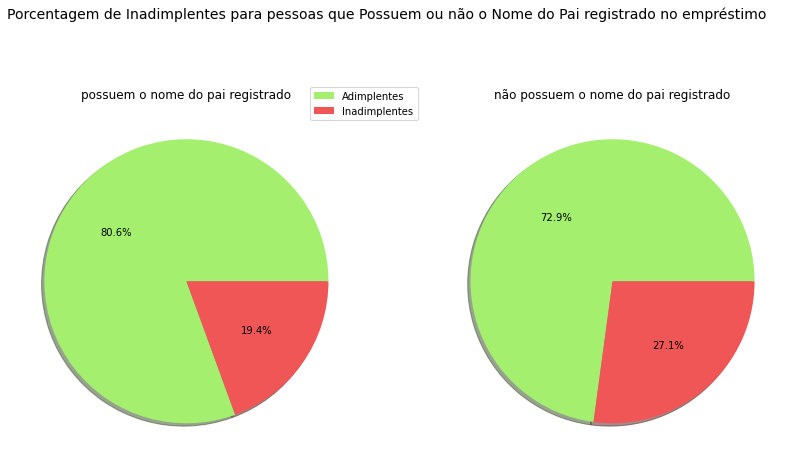

In [41]:
fig, axs = plt.subplots(1, 2,figsize=(14,8))
fig.suptitle("Porcentagem de Inadimplentes para pessoas que Possuem ou não o Nome do Pai registrado no empréstimo", fontsize=14)

axs[0].pie(fatherY.BAD.value_counts(), autopct='%1.1f%%', shadow=True, colors=['#A4F06E','#F05656'])
axs[0].set_title('possuem o nome do pai registrado')
axs[1].pie(fatherN.BAD.value_counts(), autopct='%1.1f%%', shadow=True, colors=['#A4F06E','#F05656'])
axs[1].set_title('não possuem o nome do pai registrado')

axs[0].legend(bbox_to_anchor=(1, 1), loc='center', labels=['Adimplentes','Inadimplentes'])

plt.show()

A partir dos gráficos é possível inferir que, pessoas que não adicionam o nome do pai e/ou da mãe possuem uma porcentagem maior de inadimplência.

## 4.13. Adição da Renda do Cônjuge e a variável BAD 

Como se comporta variável de Inadimplência quando associada à adição da renda do cônjuge (ao registro de empréstimo)?

Para isto, podemos analisar se a ocorrência de existir uma renda de cônjuge, independente do valor, diminui a porcentagem de inadimplência.

In [42]:
#dfs para armazenar as respostas
zeroMateIncome = df.loc[df['mateIncome']==0]
haveMateIncome = df.loc[df['mateIncome']!=0]

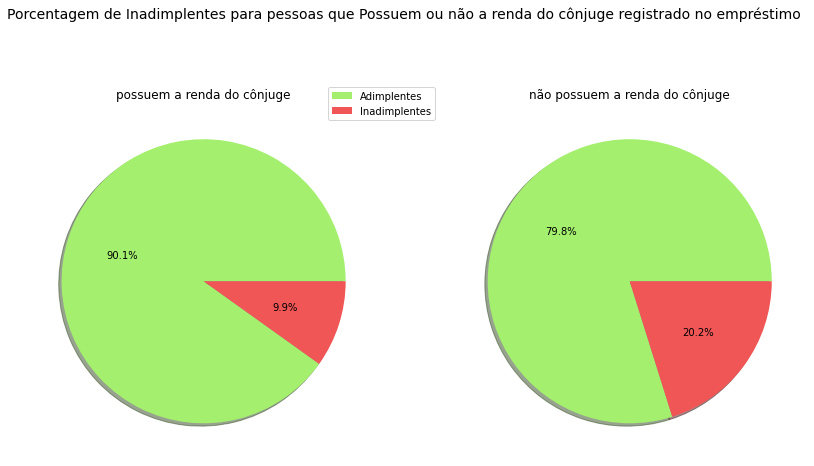

In [43]:
fig, axs = plt.subplots(1, 2,figsize=(14,8))
fig.suptitle("Porcentagem de Inadimplentes para pessoas que Possuem ou não a renda do cônjuge registrado no empréstimo", fontsize=14)

axs[0].pie(haveMateIncome.BAD.value_counts(), autopct='%1.1f%%', shadow=True, colors=['#A4F06E','#F05656'])
axs[0].set_title('possuem a renda do cônjuge')
axs[1].pie(zeroMateIncome.BAD.value_counts(), autopct='%1.1f%%', shadow=True, colors=['#A4F06E','#F05656'])
axs[1].set_title('não possuem a renda do cônjuge')

axs[0].legend(bbox_to_anchor=(1, 1), loc='center', labels=['Adimplentes','Inadimplentes'])

plt.show()

A partir dos gráficos é possível admitir que, pessoas que possuem a renda do cônjuge registradas têm menores porcentagens de inadimplência.

## 4.14. Análise Multivariada

Como se comportam as interações entre as variáveis numéricas?

### 4.14.1. Matriz do Gráfico de Dispersão

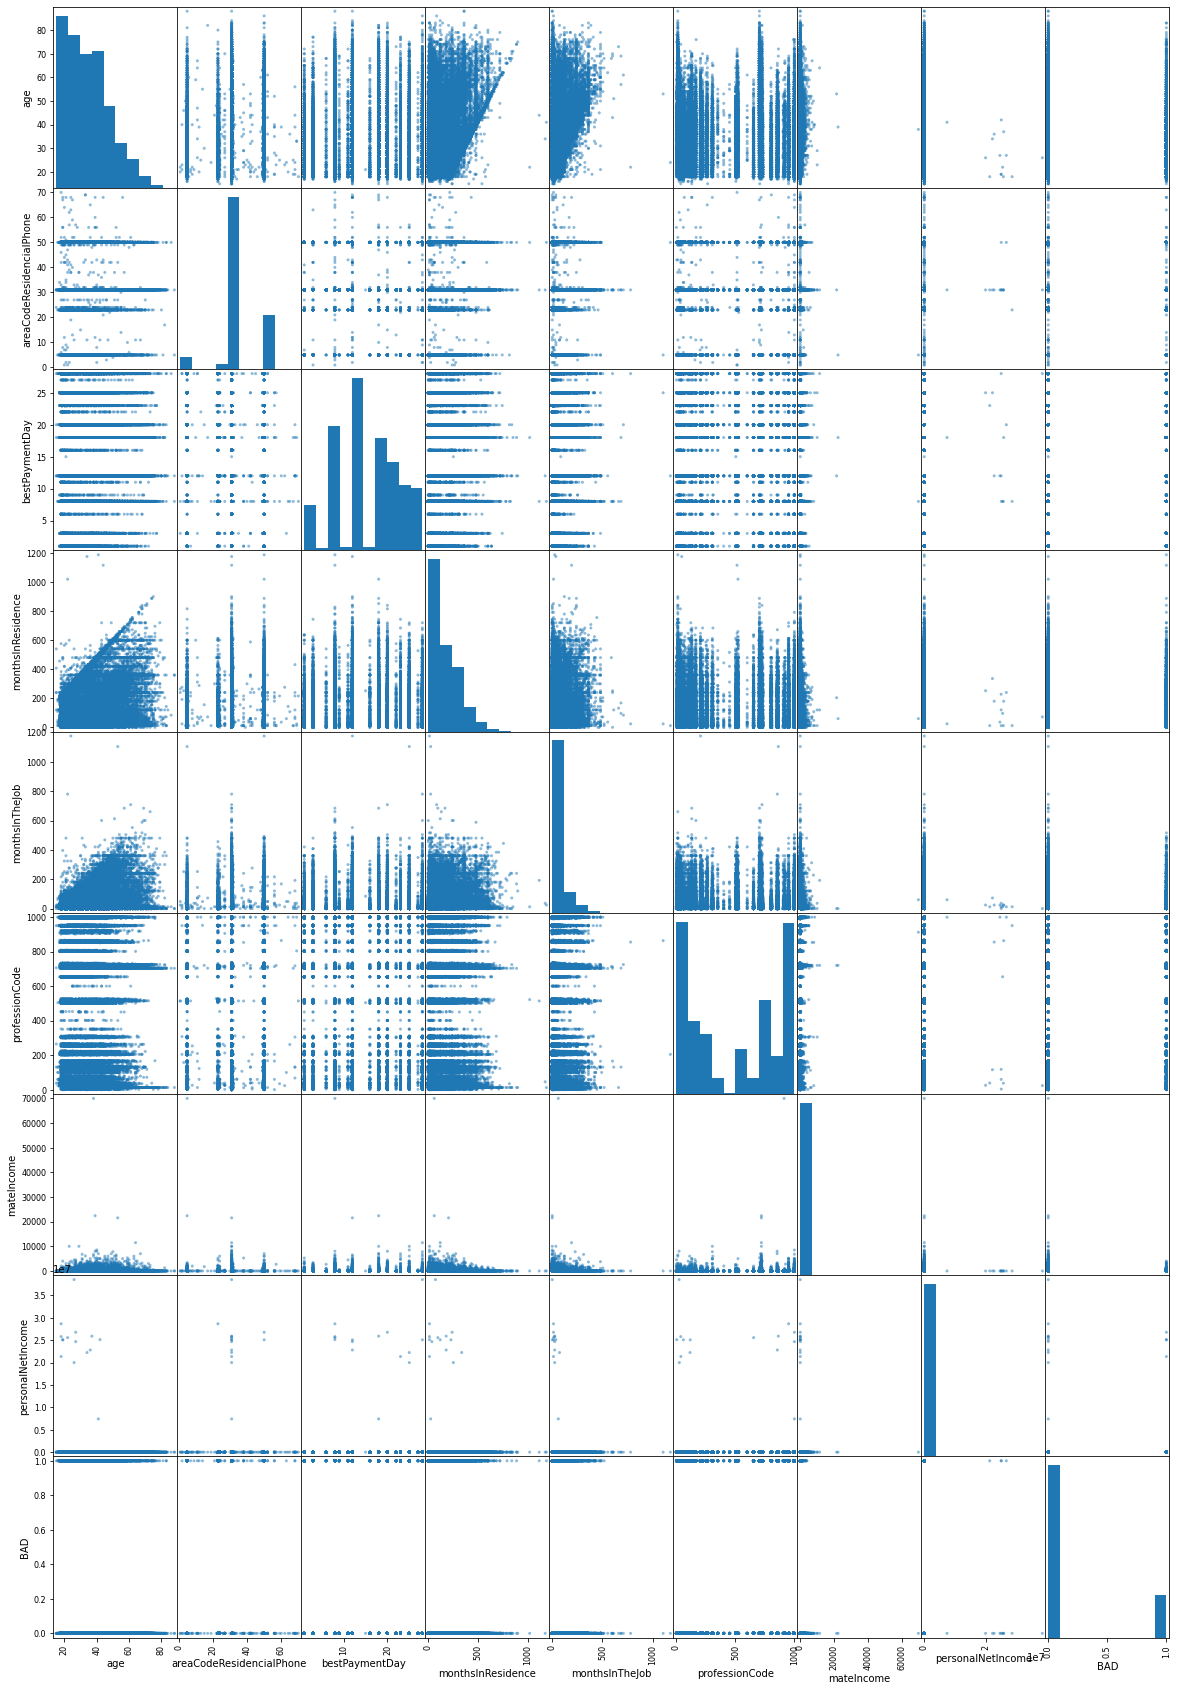

In [44]:
pd.plotting.scatter_matrix(df, figsize=(20,30))
plt.show()

### 4.14.2. Matriz do Gráfico de Caixa

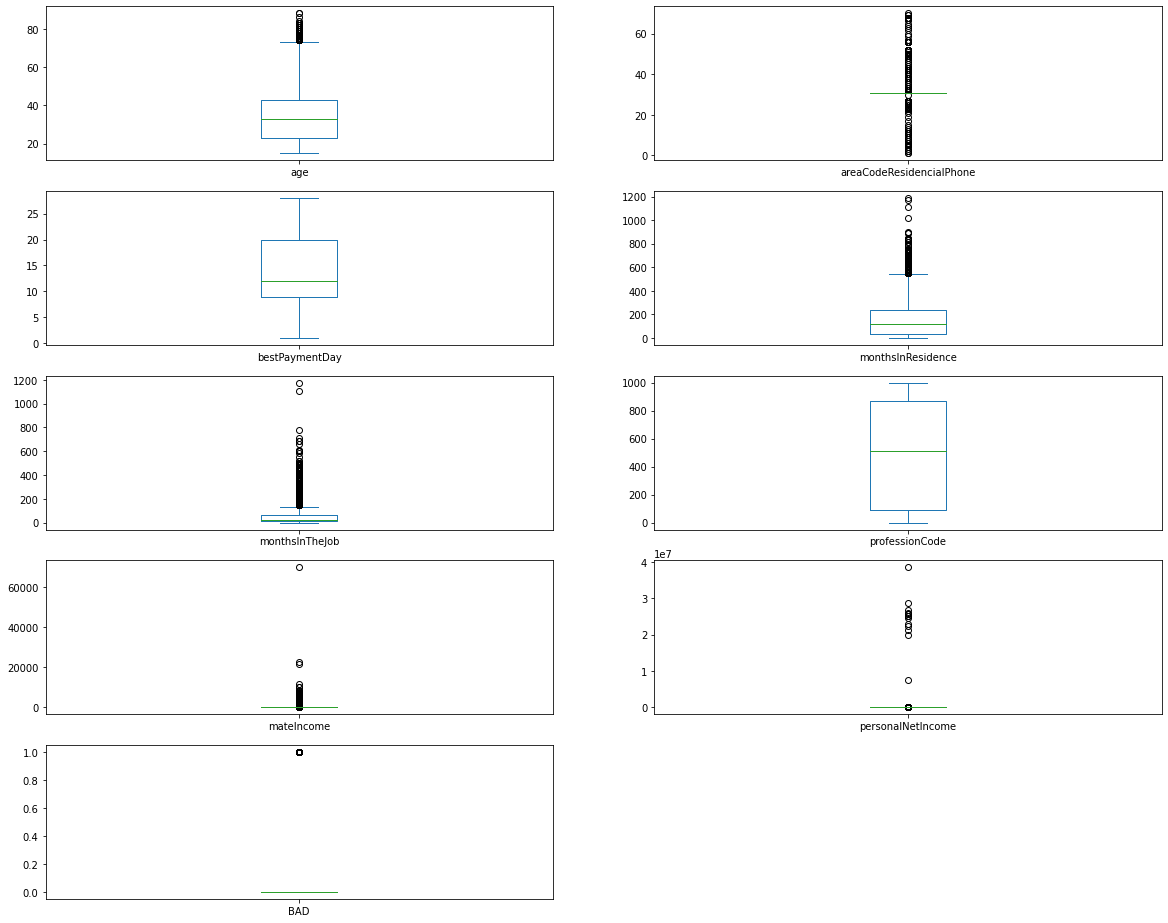

In [45]:
df.plot(kind='box', subplots=True, layout=(9,2), sharex=False, sharey=False, figsize=(20,30))
plt.show()

# 5. Feature Engineering

## 5.1. One-Hot Encoding

Para esta predição, trabalhar com dados categóricos, como por exemplo "Y" para "sim" e "N" para "não", pode confundir os algoritmos de machine learning, levando à resultados errôneos e/ou lentidão no processamento. 

Para contornar este erro, podemos utilizar a técnica de ONE-HOT Encoding, que consiste em transformar as colunas que possuem valores categóricos em colunas com valores numéricos binários únicos (0 e 1).

In [46]:
#Transformando dados categóricos em numéricos
new_columns = pd.get_dummies(df[['gender','maritalStatus', 'flagResidencialPhone', 'residenceType', 'flagMothersName',
 'flagFathersName', 'flagResidenceTown_WorkingTown', 'flagResidenceState_WorkingState', 'flagResidencialAddress_PostalAddress']])

#concatenando o dataframe original com as colunas em binário
df_OHE = pd.concat([df,new_columns], axis=1)

#excluindo as colunas antigas com dados categóricos
df_OHE.drop(['gender','maritalStatus','flagResidencialPhone', 'residenceType', 'flagMothersName',
 'flagFathersName', 'flagResidenceTown_WorkingTown', 'flagResidenceState_WorkingState', 
 'flagResidencialAddress_PostalAddress'], axis=1, inplace = True)

### 5.1.1. Informações acerca do Dataframe OHE

In [47]:
df_OHE.head()

,age,areaCodeResidencialPhone,bestPaymentDay,monthsInResidence,monthsInTheJob,professionCode,mateIncome,personalNetIncome,BAD,gender_F,...,flagMothersName_N,flagMothersName_Y,flagFathersName_N,flagFathersName_Y,flagResidenceTown_WorkingTown_N,flagResidenceTown_WorkingTown_Y,flagResidenceState_WorkingState_N,flagResidenceState_WorkingState_Y,flagResidencialAddress_PostalAddress_N,flagResidencialAddress_PostalAddress_Y
0,18,31,20,216,12,853,0,300,0,1,...,0,1,0,1,0,1,0,1,0,1
1,47,31,25,180,24,35,0,304,0,1,...,0,1,0,1,1,0,0,1,0,1
2,28,31,25,12,12,24,0,250,0,1,...,0,1,0,1,0,1,0,1,0,1
3,26,31,28,180,0,999,0,800,0,0,...,0,1,0,1,1,0,0,1,0,1
4,22,31,12,0,48,999,0,410,0,1,...,0,1,0,1,0,1,0,1,0,1


In [48]:
df_OHE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   age                                     40000 non-null  int64
 1   areaCodeResidencialPhone                40000 non-null  int64
 2   bestPaymentDay                          40000 non-null  int64
 3   monthsInResidence                       40000 non-null  int64
 4   monthsInTheJob                          40000 non-null  int64
 5   professionCode                          40000 non-null  int64
 6   mateIncome                              40000 non-null  int32
 7   personalNetIncome                       40000 non-null  int32
 8   BAD                                     40000 non-null  int64
 9   gender_F                                40000 non-null  uint8
 10  gender_M                                40000 non-null  uint8
 11  maritalStatus_C

## 5.2. Normalização e Feature Scaling

Nesta técnica, podemos ajustar os dados numéricos para que todos fiquem na mesma escala (entre 0 e 1), normalizando ou estandartizando-os, buscando, a priori, maior eficiência no uso dos algoritmos de Machine Learning.

In [49]:
#estandartização dos dados
age_std = skl.preprocessing.StandardScaler().fit_transform(df_OHE['age'].values.reshape(-1, 1)) 
areaCodeRP_std = skl.preprocessing.StandardScaler().fit_transform(df_OHE['areaCodeResidencialPhone'].values.reshape(-1, 1)) 
bestPayment_std = skl.preprocessing.StandardScaler().fit_transform(df_OHE['bestPaymentDay'].values.reshape(-1, 1)) 
monthsInRes_std = skl.preprocessing.StandardScaler().fit_transform(df_OHE['monthsInResidence'].values.reshape(-1, 1)) 
monthsInTheJob_std = skl.preprocessing.StandardScaler().fit_transform(df_OHE['monthsInTheJob'].values.reshape(-1, 1)) 
professionCode_std = skl.preprocessing.StandardScaler().fit_transform(df_OHE['professionCode'].values.reshape(-1, 1)) 
mateIncome_std = skl.preprocessing.StandardScaler().fit_transform(df_OHE['mateIncome'].values.reshape(-1, 1)) 
personalNetIn_std = skl.preprocessing.StandardScaler().fit_transform(df_OHE['personalNetIncome'].values.reshape(-1, 1)) 

In [50]:
#modificando a escala dos dados para valores entre 0 e 1 e normalizando
age_minmax= skl.preprocessing.MinMaxScaler().fit_transform(df_OHE['age'].values.reshape(-1, 1)) 
areaCodeRP_minmax = skl.preprocessing.MinMaxScaler().fit_transform(df_OHE['areaCodeResidencialPhone'].values.reshape(-1, 1)) 
bestPayment_minmax = skl.preprocessing.MinMaxScaler().fit_transform(df_OHE['bestPaymentDay'].values.reshape(-1, 1)) 
monthsInRes_minmax = skl.preprocessing.MinMaxScaler().fit_transform(df_OHE['monthsInResidence'].values.reshape(-1, 1)) 
monthsInTheJob_minmax = skl.preprocessing.MinMaxScaler().fit_transform(df_OHE['monthsInTheJob'].values.reshape(-1, 1)) 
professionCode_minmax = skl.preprocessing.MinMaxScaler().fit_transform(df_OHE['professionCode'].values.reshape(-1, 1)) 
mateIncome_minmax = skl.preprocessing.MinMaxScaler().fit_transform(df_OHE['mateIncome'].values.reshape(-1, 1)) 
personalNetIn_minmax = skl.preprocessing.MinMaxScaler().fit_transform(df_OHE['personalNetIncome'].values.reshape(-1, 1))

### 5.2.1. Criação do Dataframe Normalizado com Valores Não-Categóricos

In [51]:
#dataframes auxiliares para os valores normalizados
nm1 = pd.DataFrame(age_minmax, columns=['Age'])
nm2 = pd.DataFrame(areaCodeRP_minmax, columns=['AreaCodeResidencialPhone'])
nm3 = pd.DataFrame(bestPayment_minmax, columns=['BestPaymentDay'])
nm4 = pd.DataFrame(monthsInRes_minmax, columns=['MonthsInResidence'])
nm5 = pd.DataFrame(monthsInTheJob_minmax, columns=['MonthsInTheJob'])
nm6 = pd.DataFrame(professionCode_minmax, columns=['ProfessionCode'])
nm7 = pd.DataFrame(mateIncome_minmax, columns=['MateIncome'])
nm8 = pd.DataFrame(personalNetIn_minmax, columns=['PersonalNetIncome'])

In [52]:
#dataframe com os valores normalizados e não-categóricos
df_OHE_N = pd.concat([df_OHE, nm1['Age'],nm2['AreaCodeResidencialPhone'], nm3['BestPaymentDay'], 
 nm4['MonthsInResidence'],nm5['MonthsInTheJob'],nm6['ProfessionCode'],nm7['MateIncome'],nm8['PersonalNetIncome']], axis=1)

# exclusão das colunas antigas não-normalizadas no novo dataframe
df_OHE_N.drop(['age','areaCodeResidencialPhone', 'bestPaymentDay', 
 'monthsInResidence','monthsInTheJob','professionCode','mateIncome','personalNetIncome'], axis=1, inplace=True)

#### 5.2.1.1. Informações acerca do dataframe OHE_N

In [53]:
df_OHE_N

,BAD,gender_F,gender_M,maritalStatus_C,maritalStatus_D,maritalStatus_O,maritalStatus_S,maritalStatus_V,flagResidencialPhone_N,flagResidencialPhone_Y,...,flagResidencialAddress_PostalAddress_N,flagResidencialAddress_PostalAddress_Y,Age,AreaCodeResidencialPhone,BestPaymentDay,MonthsInResidence,MonthsInTheJob,ProfessionCode,MateIncome,PersonalNetIncome
0,0,1,0,0,0,0,1,0,0,1,...,0,1,0.041096,0.434783,0.703704,0.181818,0.010204,0.853854,0.0,0.000008
1,0,1,0,1,0,0,0,0,1,0,...,0,1,0.438356,0.434783,0.888889,0.151515,0.020408,0.035035,0.0,0.000008
2,0,1,0,0,0,0,1,0,0,1,...,0,1,0.178082,0.434783,0.888889,0.010101,0.010204,0.024024,0.0,0.000006
3,0,0,1,0,0,0,1,0,1,0,...,0,1,0.150685,0.434783,1.000000,0.151515,0.000000,1.000000,0.0,0.000021
4,0,1,0,0,0,0,1,0,0,1,...,0,1,0.095890,0.434783,0.407407,0.000000,0.040816,1.000000,0.0,0.000011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,1,0,1,1,0,0,0,0,0,1,...,0,1,0.191781,0.434783,0.407407,0.030303,0.020408,0.305305,0.0,0.000021
39996,0,1,0,0,0,0,1,0,0,1,...,0,1,0.068493,0.434783,0.703704,0.151515,0.010204,0.712713,0.0,0.000005
39997,0,0,1,0,0,0,1,0,0,1,...,0,1,0.082192,0.434783,0.407407,0.101010,0.010204,0.218218,0.0,0.000006
39998,1,1,0,0,0,0,1,0,0,1,...,0,1,0.109589,0.434783,1.000000,0.222222,0.010204,0.991992,0.0,0.000006


In [54]:
df_OHE_N.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   BAD                                     40000 non-null  int64  
 1   gender_F                                40000 non-null  uint8  
 2   gender_M                                40000 non-null  uint8  
 3   maritalStatus_C                         40000 non-null  uint8  
 4   maritalStatus_D                         40000 non-null  uint8  
 5   maritalStatus_O                         40000 non-null  uint8  
 6   maritalStatus_S                         40000 non-null  uint8  
 7   maritalStatus_V                         40000 non-null  uint8  
 8   flagResidencialPhone_N                  40000 non-null  uint8  
 9   flagResidencialPhone_Y                  40000 non-null  uint8  
 10  residenceType_A                         40000 non-null  ui

## 5.3. Tratamento de Outliers com Fence Tukey

Técnica de detecção de Outliers baseada nos intervalos interquartis.

Bibliografia utilizada pode ser encontrada aqui: 
* https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling
* https://en.wikipedia.org/wiki/Outlier#Tukey's_fences
* https://datatest.readthedocs.io/en/stable/how-to/outliers.html

In [55]:
from collections import Counter

## função de YASSINE GHOUZAM - kaggle.com, pode ser encontrada no 1º link acima.
def detect_outliers(df,n,features):
    outlier_indices = []
    
    for col in features:
        #1º quartil (25%)
        Q1 = np.percentile(df[col], 25)
        #3º quartil (75%)
        Q3 = np.percentile(df[col],75)
        # Intervalo Interquartil (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
    
    return multiple_outliers

In [56]:
#dectando os outliers assumindo que, existem pelo menos 2 outliers em cada coluna e passando as colunas a serem inspecionadas
outliers = detect_outliers(df_OHE, 2, ["monthsInResidence","monthsInTheJob","personalNetIncome"])

In [57]:
#exibindo os outliers encontrados
df_OHE.loc[outliers]

,age,areaCodeResidencialPhone,bestPaymentDay,monthsInResidence,monthsInTheJob,professionCode,mateIncome,personalNetIncome,BAD,gender_F,...,flagMothersName_N,flagMothersName_Y,flagFathersName_N,flagFathersName_Y,flagResidenceTown_WorkingTown_N,flagResidenceTown_WorkingTown_Y,flagResidenceState_WorkingState_N,flagResidenceState_WorkingState_Y,flagResidencialAddress_PostalAddress_N,flagResidencialAddress_PostalAddress_Y
6401,54,31,12,600,420,515,0,2700,1,0,...,0,1,0,1,0,1,0,1,0,1
6444,73,50,20,600,240,704,0,3512,0,1,...,0,1,0,1,1,0,0,1,0,1
8666,63,50,12,612,168,725,0,1596,0,1,...,0,1,0,1,1,0,0,1,0,1
8870,67,50,8,612,156,13,0,3036,0,0,...,0,1,0,1,1,0,0,1,0,1
15385,64,31,8,600,204,704,0,1593,0,1,...,0,1,0,1,1,0,0,1,0,1
20236,49,31,20,588,276,119,0,2280,0,1,...,0,1,0,1,1,0,0,1,0,1
21210,62,31,8,600,168,13,0,1491,0,1,...,0,1,0,1,1,0,0,1,0,1
22785,50,31,18,588,180,712,0,3000,0,1,...,0,1,0,1,0,1,0,1,0,1
26443,56,31,8,624,420,515,0,1980,0,0,...,0,1,0,1,0,1,0,1,0,1
28704,46,31,23,552,168,30,0,1680,0,1,...,0,1,0,1,1,0,0,1,0,1


Removemos portanto os outliers e criamos um dataframe novo para armazenar a base 'limpa',

In [58]:
outlier_removed = df_OHE.drop(outliers, axis=0)

### 5.3.1. Informações acerca do dataframe outlier_removed

In [59]:
outlier_removed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39987 entries, 0 to 39999
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   age                                     39987 non-null  int64
 1   areaCodeResidencialPhone                39987 non-null  int64
 2   bestPaymentDay                          39987 non-null  int64
 3   monthsInResidence                       39987 non-null  int64
 4   monthsInTheJob                          39987 non-null  int64
 5   professionCode                          39987 non-null  int64
 6   mateIncome                              39987 non-null  int32
 7   personalNetIncome                       39987 non-null  int32
 8   BAD                                     39987 non-null  int64
 9   gender_F                                39987 non-null  uint8
 10  gender_M                                39987 non-null  uint8
 11  maritalStatus_C

# 6. Modelos de Machine Learning 

## 6.1 Utilizando os dados Normalizados

### 6.1.1 Divindo os dados em Treino e Teste

In [119]:
#valores de entrada
x = df_OHE_N.drop(['BAD'], axis=1).values
#valores de saída
y = df_OHE_N['BAD'].values

In [120]:
#dividindo os dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [121]:
print('Tamanho do conjunto de Treino: {}'.format(len(x_train)))
print('Tamanho do conjunto de Teste: {}'.format(len(x_test)))

Tamanho do conjunto de Treino: 32000
Tamanho do conjunto de Teste: 8000


### 6.1.2 Árvore de Decisão

Algoritmo de aprendizado de máquina supervisionado, comumente utilizado para classificação e regressão.

Hiperparâmetros que iremos utilizar:
* criterion
* max_depth
* min_samples_split
* random_state

Primeiro Modelo de Árvore de Decisão

In [90]:
#Primeiro modelo de árvore de decisão
modelTree1 = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=2, random_state=42)

Através da Validação Cruzada, podemos ter uma ideia de quão bom um modelo pode ser,

In [91]:
#instancia uma validação cruzada com 10 subconjuntos embaralhados
cv = KFold(n_splits = 10, shuffle = True)

#faz a validação cruzada e retorna um array com as acurácias de cada iteração
scores = cross_val_score(modelTree1, x_train, y_train, scoring='accuracy', cv=cv)

print('Valores das acurácias:', scores)
print('\nMédia de valores das acurácias: %.4f' % (np.mean(scores)))
print('Desvio Padrão: %.4f' % (np.std(scores)))

Valores das acurácias: [0.7825    0.795     0.79      0.7875    0.7984375 0.79125   0.7909375
 0.79625   0.7984375 0.7909375]

Média de valores das acurácias: 0.7921
Desvio Padrão: 0.0048


Com o resultado da validação cruzada, podemos treinar o modelo

In [92]:
#treinamento do modelo
modelTree1.fit(x_train, y_train)

#teste do modelo
print("A acurácia do teste foi de:", accuracy_score(y_test, modelTree1.predict(x_test)))

A acurácia do teste foi de: 0.796


Segundo Modelo de Árvore de Decisão

In [93]:
#Segundo modelo de árvore de decisão
modelTree2 = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=2, random_state=42)

In [94]:
#instancia uma validação cruzada com 10 subconjuntos embaralhados
cv = KFold(n_splits = 10, shuffle = True)

#faz a validação cruzada e retorna um array com as acurácias de cada iteração
scores = cross_val_score(modelTree2, x_train, y_train, scoring='accuracy', cv=cv)

print('Valores das acurácias:', scores)
print('\nMédia de valores das acurácias: %.4f' % (np.mean(scores)))
print('Desvio Padrão: %.4f' % (np.std(scores)))

Valores das acurácias: [0.8021875 0.805     0.7984375 0.7975    0.8090625 0.80625   0.80625
 0.7965625 0.78875   0.8028125]

Média de valores das acurácias: 0.8013
Desvio Padrão: 0.0057


Com o resultado da validação cruzada, podemos treinar o segundo modelo

In [95]:
#treinamento do modelo
modelTree2.fit(x_train, y_train)

#teste do modelo
print("A acurácia do teste foi de:", accuracy_score(y_test, modelTree2.predict(x_test)))

A acurácia do teste foi de: 0.8035


Modificando portanto o max_depth para um valor menor, obtemos uma acurácia melhor. Enquanto a modificação do min_samples_split não trouxe diferenças.

### 6.1.3 Rede Neural MLP

In [96]:
#Modelo de rede neural MLP
mlp = MLPClassifier(hidden_layer_sizes=(31,31,31), activation='relu', solver='adam', max_iter=2000)

In [97]:
#treinamento do modelo
mlp.fit(x_train,y_train)

#teste do modelo
predict_test = mlp.predict(x_test)

In [98]:
print("A acurácia do teste foi de:", accuracy_score(y_test, mlp.predict(x_test)))

A acurácia do teste foi de: 0.789


In [99]:
#Métricas para avaliação do Modelo
print(classification_report(y_test,predict_test))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      6420
           1       0.37      0.10      0.15      1580

    accuracy                           0.79      8000
   macro avg       0.59      0.53      0.52      8000
weighted avg       0.72      0.79      0.74      8000



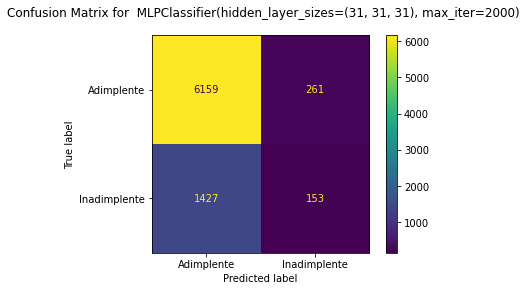

In [100]:
fig = ConfusionMatrixDisplay.from_predictions(y_test, predict_test, display_labels=["Adimplente","Inadimplente"])
fig.figure_.suptitle("Confusion Matrix for  " + str(mlp))
plt.show()

## 6.2 Utilizando os dados Não-Normalizados

### 6.2.1 Divindo os dados em Treino e Teste

In [101]:
#valores de entrada
x = df_OHE.drop(['BAD'], axis=1).values
#valores de saída
y = df_OHE['BAD'].values

In [102]:
#dividindo os dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [103]:
print('Tamanho do conjunto de Treino: {}'.format(len(x_train)))
print('Tamanho do conjunto de Teste: {}'.format(len(x_test)))

Tamanho do conjunto de Treino: 32000
Tamanho do conjunto de Teste: 8000


### 6.2.2 Árvore de Decisão


Hiperparâmetros que iremos utilizar:
* criterion
* max_depth
* min_samples_split
* random_state

Utilizando o Segundo Modelo de Árvore de Decisão criado em 6.1.2,

In [104]:
#instancia uma validação cruzada com 10 subconjuntos embaralhados
cv = KFold(n_splits = 10, shuffle = True)

#faz a validação cruzada e retorna um array com as acurácias de cada iteração
scores = cross_val_score(modelTree2, x_train, y_train, scoring='accuracy', cv=cv)

print('Valores das acurácias:', scores)
print('\nMédia de valores das acurácias: %.4f' % (np.mean(scores)))
print('Desvio Padrão: %.4f' % (np.std(scores)))

Valores das acurácias: [0.795     0.8046875 0.81375   0.79625   0.801875  0.81125   0.795625
 0.8003125 0.808125  0.798125 ]

Média de valores das acurácias: 0.8025
Desvio Padrão: 0.0064


In [105]:
#treinamento do modelo
modelTree2.fit(x_train, y_train)

#teste do modelo
print("A acurácia do teste foi de:", accuracy_score(y_test, modelTree2.predict(x_test)))

A acurácia do teste foi de: 0.8035


Aparentemente para este caso, a normalização dos dados não interferiu no resultado final.

## 6.3 Utilizando os dados com Remoção de Outlier

### 6.3.1 Divindo os dados em Treino e Teste

In [106]:
#valores de entrada
x = outlier_removed.drop(['BAD'], axis=1).values
#valores de saída
y = outlier_removed['BAD'].values

In [107]:
#dividindo os dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [108]:
print('Tamanho do conjunto de Treino: {}'.format(len(x_train)))
print('Tamanho do conjunto de Teste: {}'.format(len(x_test)))

Tamanho do conjunto de Treino: 31989
Tamanho do conjunto de Teste: 7998


### 6.3.2 Árvore de Decisão

Hiperparâmetros que iremos utilizar:
* criterion
* max_depth
* min_samples_split
* random_state

Utilizando o Segundo Modelo de Árvore de Decisão criado em 6.1.2,

In [109]:
#instancia uma validação cruzada com 10 subconjuntos embaralhados
cv = KFold(n_splits = 10, shuffle = True)

#faz a validação cruzada e retorna um array com as acurácias de cada iteração
scores = cross_val_score(modelTree2, x_train, y_train, scoring='accuracy', cv=cv)

print('Valores das acurácias:', scores)
print('\nMédia de valores das acurácias: %.4f' % (np.mean(scores)))
print('Desvio Padrão: %.4f' % (np.std(scores)))

Valores das acurácias: [0.80400125 0.81150359 0.81744295 0.80431385 0.80556424 0.79649891
 0.80775242 0.79306033 0.79274773 0.79987492]

Média de valores das acurácias: 0.8033
Desvio Padrão: 0.0075


Com o resultado da validação cruzada, podemos treinar o modelo

In [110]:
#treinamento do modelo
modelTree2.fit(x_train, y_train)

#teste do modelo
print("A acurácia do teste foi de:", accuracy_score(y_test, modelTree2.predict(x_test)))

A acurácia do teste foi de: 0.8024506126531633


Aparentemente para este caso, a remoção de outliers dos dados não interferiu no resultado final.

# 7. Considerações Finais e Escolha do Modelo

A partir das análises, todos os modelos obtiveram acurácias altas. Em relação aos dados, para a Árvore de Decisão, não importou a normalização e remoção de Outliers. Para todos os 3 casos, as acurácias se mantiveram próximas de 79%.

Para o modelo de Rede Neural MLP, a predição alcançou também um valor próximo de 79%.
Tendo como base a Matriz de Confusão, podemos perceber que o modelo classifica bem os casos de clientes Adimplentes (BAD = 0), enquanto para os casos de clientes que são Inadimplentes (BAD = 1), a classificação não é tão boa, onde na maior parte dos casos que foram realizados os testes, estes foram classificados como Adimplentes.

A partir dessas considerações, podemos dizer que o melhor modelo avaliado foi o segundo modelo de Árvore de Decisão, sendo o que obteve a maior acurácia no menor tempo.

In [111]:
#Modelo Final escolhido para prever a variável BAD
modelTree2 = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=2, random_state=42) 